# KNN and Naïve Bayes

In [1]:
# 3. You are given a dataset which consists of the medical records of Pima Indian women. 
  # The problem is to find if a new person whose medical data is given as input has a chance of getting diabetes in the next 5 years.
  # This is indicated by 1 or 0 in the last column of the dataset. 
  # Please use classification models such as KNN and Naïve Bayes and find the best of the two models for the given data set.
  # Use python to prepare the data and create the models and cross-validate the dataset. 
  # Please make sure you also use appropriate performance measures, error values, 
  # bias and variance to come to conclusion of the best dataset

import pandas as pd
import numpy as np

from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Load the dataset

In [2]:
# Load the dataset

df = pd.read_csv('D:/AIML-L2/Pima-Indians-Diabetes_Q3.csv')


# Chek the data frame

df.head()
#df.isnull().sum()
#df.dtypes
#df.shape

# Data prepration

In [3]:
# If any values is null or nan
df.isnull().sum()

Num_Pregnant      0
Plasma_glucose    0
Blood_press       0
Skin_thik         0
Serum_insulin     0
Body_index        0
Diabetes_fun      0
Age               0
Class             0
dtype: int64

In [4]:
# Data types of variable

df.dtypes

Num_Pregnant        int64
Plasma_glucose      int64
Blood_press         int64
Skin_thik           int64
Serum_insulin       int64
Body_index        float64
Diabetes_fun      float64
Age                 int64
Class               int64
dtype: object

In [5]:
# Check the rows and column
df.shape

(769, 9)

In [6]:
#
df.describe()

,Num_Pregnant,Plasma_glucose,Blood_press,Skin_thik,Serum_insulin,Body_index,Diabetes_fun,Age,Class
count,769.000000,769.000000,769.00000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000
mean,3.843953,120.582575,69.06502,20.565670,78.420026,32.056931,0.465705,33.224967,0.348505
std,3.367521,32.155040,19.37274,15.976991,113.822157,8.011745,0.325126,11.729042,0.476807
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.078000,18.000000,0.000000
25%,1.000000,99.000000,62.00000,0.000000,0.000000,27.300000,0.238000,24.000000,0.000000
50%,3.000000,117.000000,72.00000,23.000000,25.000000,32.100000,0.365000,29.000000,0.000000
75%,6.000000,140.000000,80.00000,32.000000,125.000000,36.600000,0.613000,41.000000,1.000000
max,17.000000,199.000000,122.00000,99.000000,846.000000,70.800000,2.420000,81.000000,1.000000


# Find the feature and Traget variables

In [7]:
# Get the feature and traget variable

x = np.array(df.drop(['Class'], axis = 1))
y = np.array(df['Class'])

In [8]:
x.shape

(769, 8)

In [9]:
y.shape

(769,)

# Split the data into Trian & Test dataset

In [10]:
# Split the data into train and test set

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=7)

# Apply the KNN module

In [11]:
# Apply the KNN module

Knn = KNeighborsClassifier(n_neighbors=5)

# Train the data using Fit method

In [12]:
# Train your data using fit method

Knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [13]:
#df.isnull()
#df.mean(axis=0)
#y_test

# Check the accuracy of the module


In [14]:
# Test the data
# This to see how accurate the algorithm is in terms of defining the diabetes to be either 1 or 0
Acc = Knn.score(x_test, y_test)

print('Accury of the model is:', Acc)


Accury of the model is: 0.7229437229437229


# #Plotting and visualisation (focus on only two features from the dataset)

In [15]:
# Choose only two var
x1 = np.array(df[['Plasma_glucose', 'Age']])
y1 = np.array(df['Class'])

In [16]:
h =0.2

In [17]:
from matplotlib.colors import ListedColormap

In [18]:
# Create color maps using hex_colors
cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#0000FF'])

In [19]:
# apply the neighous classifier and fit the data
x1_train, x1_test, y1_train, y1_test = train_test_split(x1,y1, test_size=0.2, random_state = 7)

In [20]:
Knn1 = KNeighborsClassifier(n_neighbors= 15)
Knn1

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=15, p=2,
           weights='uniform')

In [21]:
#
Knn1.fit(x1,y1)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=15, p=2,
           weights='uniform')

In [22]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
x_min, x_max = x1[:, 0].min() - 1, x1[:, 0].max() + 1
y_min, y_max = x1[:, 1].min() - 1, x1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = Knn1.predict(np.c_[xx.ravel(), yy.ravel()])

In [23]:
# Put the result into a color plot
#Z = Z.reshape(xx.shape)
#plt.figure()
#plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

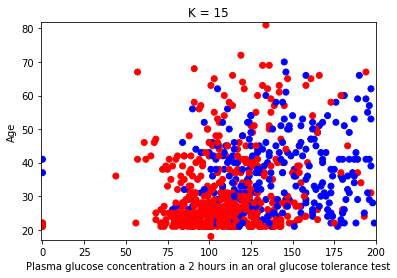

In [24]:
# Plot also the training points
plt.scatter(x1[:, 0], x1[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('Plasma glucose concentration a 2 hours in an oral glucose tolerance test')
plt.ylabel('Age')
plt.title('K = 15')

plt.show()

# Using Naive Bayes

In [25]:
from sklearn.naive_bayes import GaussianNB

In [26]:
Gnb = GaussianNB()

In [27]:
Gnb.fit(x_train, y_train)

GaussianNB(priors=None)

In [28]:
pred = Gnb.predict(x_test)
pred

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0], dtype=int64)

In [29]:
pred1 = Gnb.predict(x_test)
pred1

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0], dtype=int64)